# Experiments - Heuristics

In this notebook we perform experiments related to the implemented heuristics:
- [Bottom-Left-Back-Fill](https://www.jstor.org/stable/25146993)
- [HAPE](https://www.researchgate.net/publication/225664027_Heuristic_algorithm_based_on_the_principle_of_minimum_total_potential_energy_HAPE_A_new_algorithm_for_nesting_problems)
- [Heightmap-Minimization](https://arxiv.org/abs/1812.04093)

In [5]:
from src.environment import PackingEnv, Container
from src.agents import GreedyAgent
from src.heuristics import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

All possible combinations of heuristics, given as separate agents:

In [6]:
agent1 = GreedyAgent(heuristics=[BLBF()])
agent2 = GreedyAgent(heuristics=[HAPE()])
agent3 = GreedyAgent(heuristics=[HeightMapMinimization()])
agent4 = GreedyAgent(heuristics=[HeightMapMinimization(axis=0), HeightMapMinimization(axis=1), HeightMapMinimization(axis=2)])
agent5 = GreedyAgent(heuristics=[BLBF(), HAPE()])
agent6 = GreedyAgent(heuristics=[BLBF(), HeightMapMinimization()])
agent7 = GreedyAgent(heuristics=[BLBF(), HeightMapMinimization(axis=0), HeightMapMinimization(axis=1), HeightMapMinimization(axis=2)])
agent8 = GreedyAgent(heuristics=[HAPE(), HeightMapMinimization()])
agent9 = GreedyAgent(heuristics=[HAPE(), HeightMapMinimization(axis=0), HeightMapMinimization(axis=1), HeightMapMinimization(axis=2)])
agent10 = GreedyAgent(heuristics=[BLBF(), HAPE(), HeightMapMinimization()])
agent11 = GreedyAgent(heuristics=[BLBF(), HAPE(), HeightMapMinimization(axis=0), HeightMapMinimization(axis=1), HeightMapMinimization(axis=2)])

agents = [agent1, agent2, agent3, agent4, agent5, agent6, agent7, agent8, agent9, agent10, agent11]

## Container 1: 3x3x3

In [ ]:
# repeat for 100 seeds
seeds = np.arange(100).tolist()

polycubes_packed = np.zeros((len(seeds), len(agents)))
time_per_polycube = np.zeros((len(seeds), len(agents)))

for seed in seeds:
    # create an environment with the given seed
    env = PackingEnv(
        Container(3, 3, 3),
        upper_bound=3,
        seq_length=10,
        cache_path='C:/Users/Thoma/OneDrive/Documenten/GitHub/Online-Polycube-Packing/resources/polycubes',
        seed=seed
    )
    for i, agent in enumerate(agents):
        env.reset()
        # run the agent until the environment is terminal
        start_time = time.time_ns()
        while not env.is_terminal():
            env.step(agent.get_action(env))
        # save the results
        time_per_polycube[seed, i] = (time.time_ns() - start_time) / len(env.container.get_ids())
        polycubes_packed[seed, i] = len(env.container.get_ids())

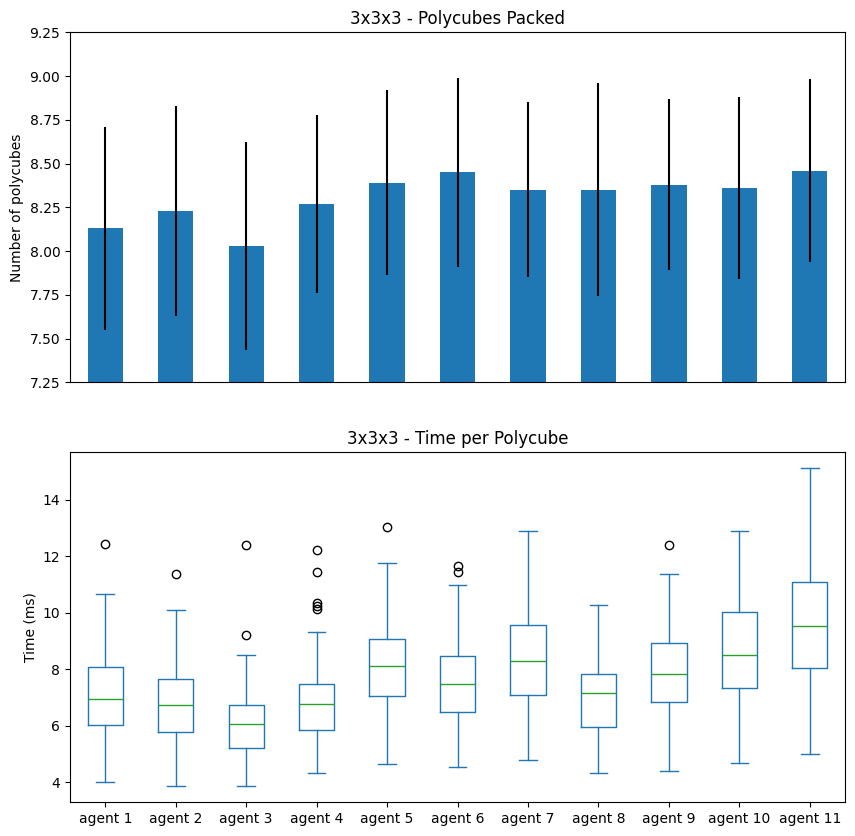

In [8]:
# load the results
polycubes_packed_df = pd.DataFrame(polycubes_packed, columns=[f'agent {i + 1}' for i in range(len(agents))], dtype=int)
polycubes_packed_df.index.name = 'seed'
time_per_polycube_df = pd.DataFrame(time_per_polycube / 1e6, columns=[f'agent {i + 1}' for i in range(len(agents))])
time_per_polycube_df.index.name = 'seed'

# plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
polycubes_packed_df.describe().T['mean'].plot.bar(ax=ax[0], yerr=polycubes_packed_df.describe().T['std'])
ax[0].set_title('3x3x3 - Polycubes Packed')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('Number of polycubes')
ax[0].set_ylim(7.25, 9.25)
time_per_polycube_df.plot.box(ax=ax[1])
ax[1].set_title('3x3x3 - Time per Polycube')
ax[1].set_ylabel('Time (ms)')
plt.show()

## Container 2: 5x3x3

In [ ]:
# repeat for 100 seeds
seeds = np.arange(100).tolist()

polycubes_packed = np.zeros((len(seeds), len(agents)))
time_per_polycube = np.zeros((len(seeds), len(agents)))

for seed in seeds:
    # create an environment with the given seed
    env = PackingEnv(
        Container(5, 3, 3),
        upper_bound=5,
        seq_length=15,
        cache_path='C:/Users/Thoma/OneDrive/Documenten/GitHub/Online-Polycube-Packing/resources/polycubes',
        seed=seed
    )
    for i, agent in enumerate(agents):
        env.reset()
        # run the agent until the environment is terminal
        start_time = time.time_ns()
        while not env.is_terminal():
            env.step(agent.get_action(env))
        # save the results
        time_per_polycube[seed, i] = (time.time_ns() - start_time) / len(env.container.get_ids())
        polycubes_packed[seed, i] = len(env.container.get_ids())

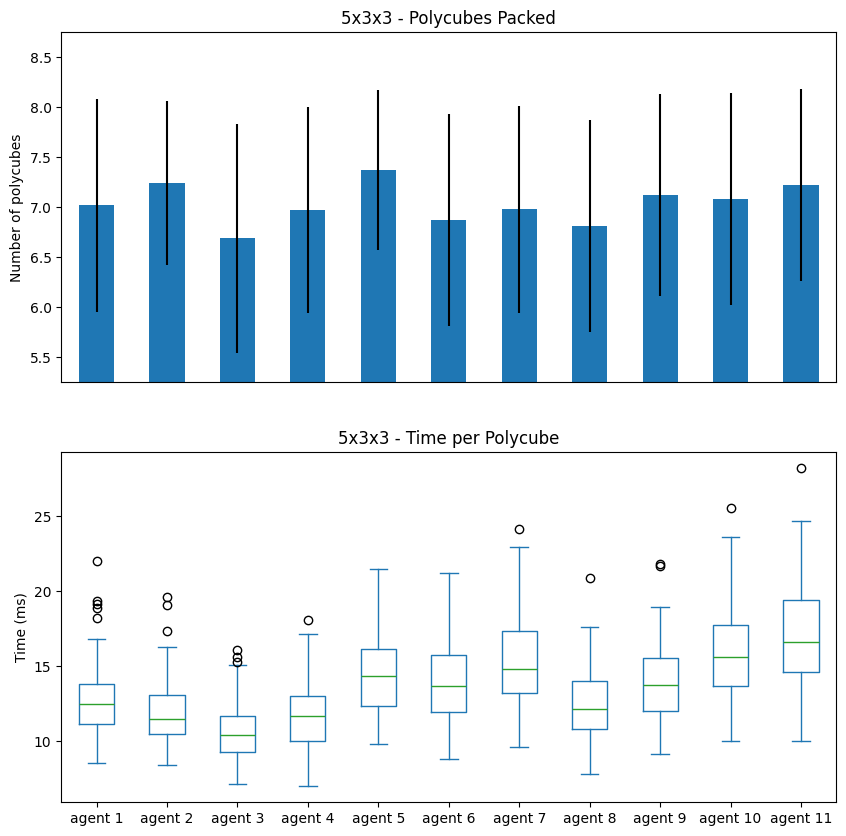

In [10]:
# load the results
polycubes_packed_df = pd.DataFrame(polycubes_packed, columns=[f'agent {i + 1}' for i in range(len(agents))], dtype=int)
polycubes_packed_df.index.name = 'seed'
time_per_polycube_df = pd.DataFrame(time_per_polycube / 1e6, columns=[f'agent {i + 1}' for i in range(len(agents))])
time_per_polycube_df.index.name = 'seed'

# plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
polycubes_packed_df.describe().T['mean'].plot.bar(ax=ax[0], yerr=polycubes_packed_df.describe().T['std'])
ax[0].set_title('5x3x3 - Polycubes Packed')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('Number of polycubes')
ax[0].set_ylim(5.25, 8.75)
time_per_polycube_df.plot.box(ax=ax[1])
ax[1].set_title('5x3x3 - Time per Polycube')
ax[1].set_ylabel('Time (ms)')
plt.show()

## Container 3: 4x4x4

In [ ]:
# repeat for 100 seeds
seeds = np.arange(100).tolist()

polycubes_packed = np.zeros((len(seeds), len(agents)))
time_per_polycube = np.zeros((len(seeds), len(agents)))

for seed in seeds:
    # create an environment with the given seed
    env = PackingEnv(
        Container(4, 4, 4),
        upper_bound=4,
        seq_length=20,
        cache_path='C:/Users/Thoma/OneDrive/Documenten/GitHub/Online-Polycube-Packing/resources/polycubes',
        seed=seed
    )
    for i, agent in enumerate(agents):
        env.reset()
        # run the agent until the environment is terminal
        start_time = time.time_ns()
        while not env.is_terminal():
            env.step(agent.get_action(env))
        # save the results
        time_per_polycube[seed, i] = (time.time_ns() - start_time) / len(env.container.get_ids())
        polycubes_packed[seed, i] = len(env.container.get_ids())

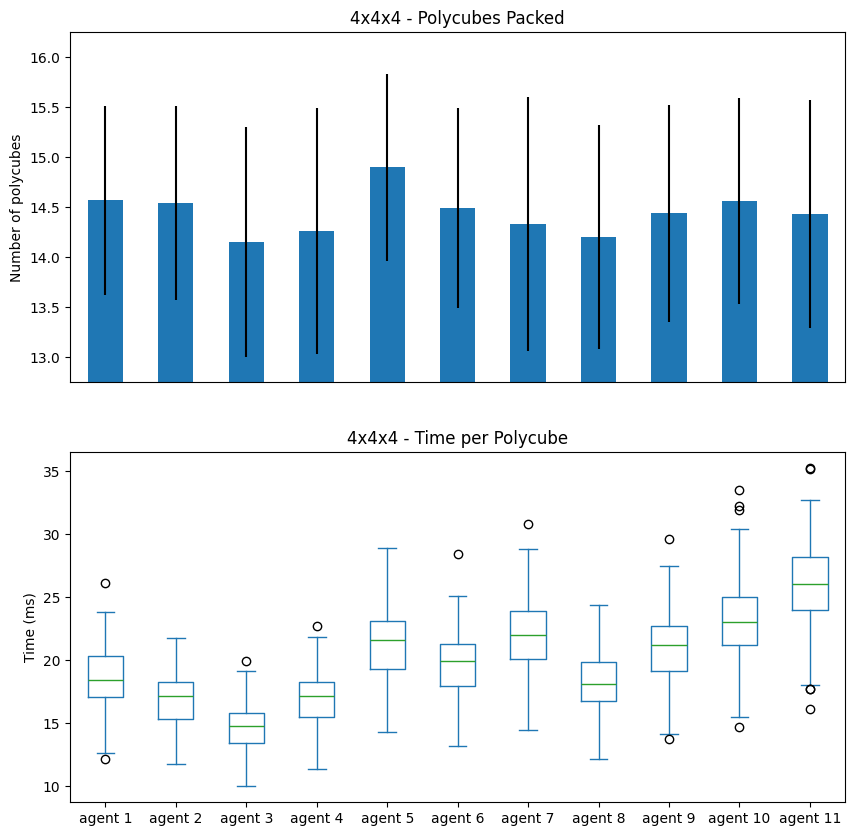

In [12]:
# load the results
polycubes_packed_df = pd.DataFrame(polycubes_packed, columns=[f'agent {i + 1}' for i in range(len(agents))], dtype=int)
polycubes_packed_df.index.name = 'seed'
time_per_polycube_df = pd.DataFrame(time_per_polycube / 1e6, columns=[f'agent {i + 1}' for i in range(len(agents))])
time_per_polycube_df.index.name = 'seed'

# plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
polycubes_packed_df.describe().T['mean'].plot.bar(ax=ax[0], yerr=polycubes_packed_df.describe().T['std'])
ax[0].set_title('4x4x4 - Polycubes Packed')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('Number of polycubes')
ax[0].set_ylim(12.75, 16.25)
time_per_polycube_df.plot.box(ax=ax[1])
ax[1].set_title('4x4x4 - Time per Polycube')
ax[1].set_ylabel('Time (ms)')
plt.show()

## Container 4: 6x4x4

In [ ]:
# repeat for 100 seeds
seeds = np.arange(100).tolist()

polycubes_packed = np.zeros((len(seeds), len(agents)))
time_per_polycube = np.zeros((len(seeds), len(agents)))

for seed in seeds:
    # create an environment with the given seed
    env = PackingEnv(
        Container(6, 4, 4),
        upper_bound=6,
        seq_length=20,
        cache_path='C:/Users/Thoma/OneDrive/Documenten/GitHub/Online-Polycube-Packing/resources/polycubes',
        seed=seed
    )
    for i, agent in enumerate(agents):
        env.reset()
        # run the agent until the environment is terminal
        start_time = time.time_ns()
        while not env.is_terminal():
            env.step(agent.get_action(env))
        # save the results
        time_per_polycube[seed, i] = (time.time_ns() - start_time) / len(env.container.get_ids())
        polycubes_packed[seed, i] = len(env.container.get_ids())

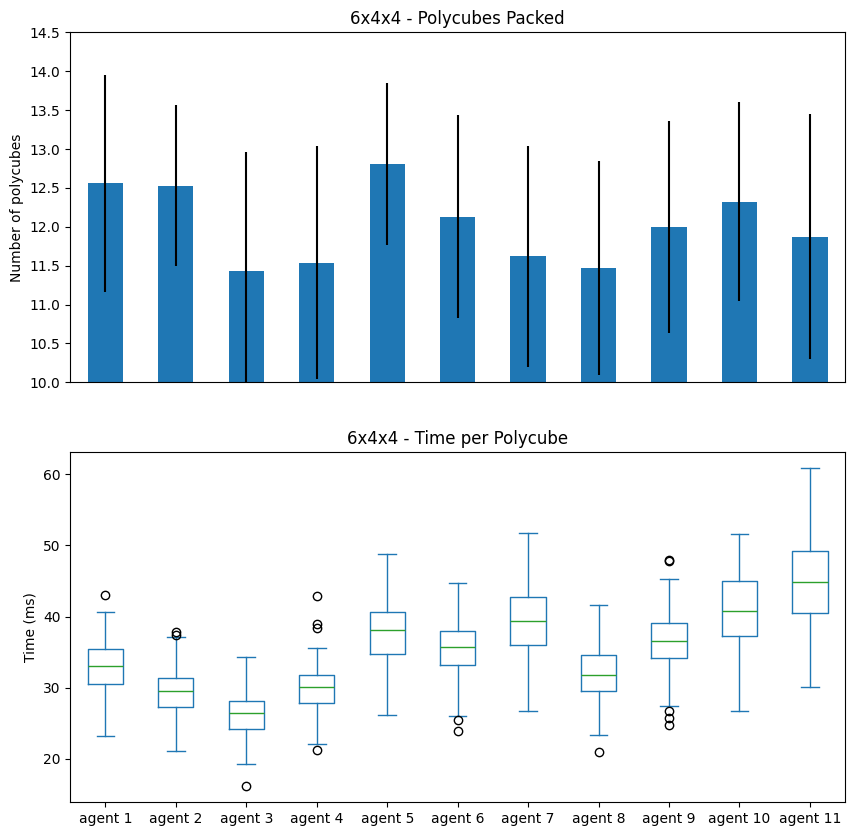

In [15]:
# load the results
polycubes_packed_df = pd.DataFrame(polycubes_packed, columns=[f'agent {i + 1}' for i in range(len(agents))], dtype=int)
polycubes_packed_df.index.name = 'seed'
time_per_polycube_df = pd.DataFrame(time_per_polycube / 1e6, columns=[f'agent {i + 1}' for i in range(len(agents))])
time_per_polycube_df.index.name = 'seed'

# plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
polycubes_packed_df.describe().T['mean'].plot.bar(ax=ax[0], yerr=polycubes_packed_df.describe().T['std'])
ax[0].set_title('6x4x4 - Polycubes Packed')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('Number of polycubes')
ax[0].set_ylim(10, 14.5)
time_per_polycube_df.plot.box(ax=ax[1])
ax[1].set_title('6x4x4 - Time per Polycube')
ax[1].set_ylabel('Time (ms)')
plt.show()